<h1 style="color: #001a79;">Lady Tasting Tea Problem:</h1>
<h2 style="color: #001a79;">Exercise 1.1</h2>

<hr style="border-top: 1px solid #001a79;" />

<h4> Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting<br>
    the correct cups is less than or equal to 1%. <h4>

<b>Pre-Exercise:<b>

In [1]:
# Math module
import math

The following was adapted from https://stackoverflow.com/a/4941932.

In [2]:
# Original Problem:
# Number of ways of selecting 4 cups from 8 (i.e: 8 choose 4)
num_combinations = math.comb(8, 4)
num_combinations

70

In [3]:
# Probability of randomly selecting 4 correct cups when we dont take 
# order into consideration
probability = 1.0 / num_combinations
round(probability, 5)

0.01429


<br>

<b>Main Exercise:<b>

As shown above, when the experiment is conducted with 8 cups total (4 with milk first and 4 with tea first) there is roughly 1.4%<br>
chance of randomly selecting the 8 cups correctly. In the interest lowering this probablity to 1% lets adds 1 more cup into the mix.

In [4]:
# Number of ways of selecting 4 cups from 9
num_combinations = math.comb(9, 4)

# Probability of randomly selecting correct cups is:
probability = 1.0 / num_combinations

print("Number of combinations:  {}".format(num_combinations))
print("Probability: {}".format(round(probability, 5)))

Number of combinations:  126
Probability: 0.00794



<br>

Now we see the probability at roughly 0.79%. The reduced probability can be attributed to the higher number of combinations<br>
available for selection in the experiment, going from 70 (8 total cups) to 126 (9 total cups).

In [5]:
# Number of ways of selecting 4 cups from 10
num_combinations = math.comb(10, 4)

# Probability of randomly selecting correct cups is:
probability = 1.0 / num_combinations

print("Number of combinations:  {}".format(num_combinations))
print("Probability: {}".format(round(probability, 5)))

Number of combinations:  210
Probability: 0.00476



<br>

**Answer:**<br>
From the results above we can conclude that a total of 10 cups deviates the probability of selecting the correct cups further<br>
away from 1% target. An experiment with a total of 9 cups best alligns the probabilty of randomly selecting the correct cups<br>
based on the exercise criteria.

  
 <br> 
 
 <b> 1.1 Bonus Question : How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold? <b>  
*** 

Lets explore the discrete distribution when selecting 4 cups from 8.


In [6]:
import random            # random selection module    
import seaborn as sns    # plotting module
import itertools         # module that can generate combinations

In [7]:
cup_list = list(range(8))
cup_list

[0, 1, 2, 3, 4, 5, 6, 7]

In [8]:
comb_list = list(itertools.combinations(cup_list, 4))
print("Number of combinations in list: {}".format(len(comb_list)))


# Pick a random selection from the list of 70 to simulate the experiment.
# Store selection as a set: this datastructure doesnt care about order.... reference 
        # used when you dont care about order (i.e: 0 1 2 3   =  3 2 1 0)
        # dont have order or keep count
        # have unique values 
        
selection = set(random.choice(comb_list))
print("Selection Combination:  {}".format(selection))

Number of combinations in list: 70
Selection Combination:  {0, 1, 2, 4}


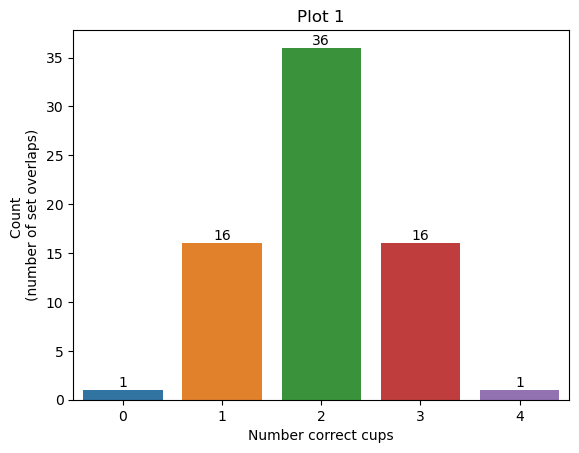

In [9]:
# iterate all possible 70 combinations 
# get intersection between 4 correct cups (selection) and all combinations
    # leverage set datastructure so that an overlap does not care about order.. e.g {1,2,3,4} = {4,2,3,1}

counts = [len(selection & set(i)) for i in itertools.combinations(cup_list, 4)]

# plot with labels
ax = sns.countplot(x=counts)
ax.set(xlabel='Number correct cups', ylabel='Count \n(number of set overlaps)')
ax.set(title='Plot 1')
ax.bar_label(ax.containers[0]);

When looking at plot 1 it becomes more obvious how to deal with the bonus question. When allowing one in-correct cup selection one must sum<br>
the count at 3 correct and 4 correct cups to account for both scenarios. This total of 17 is then divided by 70 (total number of combinations) to<br>
yield a probability of roughly 0.24 (24%). When accepting the null hyphotheis for this problem, i.e: the results are due to random chance, allowing<br>
one wrong cup selection has alomost a 1 in 4 chance of sucessfully guessing the correct selection.<br>

Back to the problem, lets alter the experiment by increasing the total number of cups of tea while tracking the count overlap to allow for one in-correct<br>
selection. The number of cups of type A (milk in first) will remain at 4 and the number of cups of type B (tea in first) will equal the total number of cups<br>
minus number of type A cups. In other words lets keep type A constant and increase the total number of cups.

In [10]:
dictFotPlot = {
   'total_num_cups' : [],
   'probability' : [],
}

# iterate from 8 to a larger value of total num of cups
for total_num_cups in range(8, 25):

    # declare number of cup type A (e.g milk in first)
    num_cup_type_a = 4
    
    cup_list = list(range(total_num_cups))
    comb_list = list(itertools.combinations(cup_list, 4))

    selection = set(random.choice(comb_list))
    counts = [len(selection & set(i)) for i in itertools.combinations(cup_list, 4)]

    # allowing for 1 wrong cup selection
        # overlap = sum of counts from position 3 and 4 of plot 1
    overlap = counts.count(4) + counts.count(3)
    
    # calculate probabilities
    probability = overlap / len(comb_list)
    
    # append probability and total cup data to dict
    dictFotPlot['total_num_cups'].append(total_num_cups)
    dictFotPlot['probability'].append(probability)

In [11]:
# iterate the idx position and val of probability array of dictFotPlot dict
for idx, prob in enumerate(dictFotPlot['probability']):
    if prob <= 0.01:
        # store the total_num_cups associated with the probability
        answer = dictFotPlot['total_num_cups'][idx]
        # stop iterating when val meets criteria
        break  
        
print("A probablity of 1% of maintained when the total number of cups = {}".format(answer))

A probablity of 1% of maintained when the total number of cups = 22


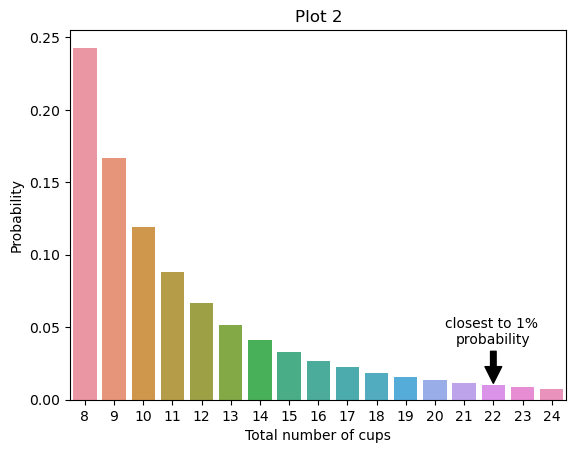

In [12]:
# plot data
ax = sns.barplot(data=dictFotPlot, x='total_num_cups', y='probability')
ax.set(xlabel='Total number of cups', ylabel='Probability')
ax.set(title='Plot 2')

# plot label code adapted from https://stackoverflow.com/a/47718154
# iterate idx and vals of x axis labels
for i, text in enumerate(ax.get_xticklabels()):
    # if text equals total number of cups assocated with <1% prob
    if text.get_text() == str(answer):   
        # apply label
        ax.annotate("closest to 1% \nprobability",(i, ax.patches[i].get_height()), 
                    xytext=(0,30), textcoords='offset points', ha="center",
                    arrowprops=dict(facecolor='black', shrink=0.05))